In [1]:
# use pandas numpy as usual
import pandas as pd
import numpy as np
from split_data_n_ways import split_data_n_ways

# TensorFlow ≥2.4.1 is required
import tensorflow as tf
np.random.seed(42)
tf.random.set_seed(42)
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras.layers.experimental import preprocessing 

#### This is how you import deep_autoviml
from deep_autoviml import deep_autoviml as deepauto


Imported deep_auto_viml version=0.0.5 Build deep learning models, pipelines, fast!
--- 
model, dictionary = deep_auto_viml.run(train_data_or_file, target, keras_model_type)
---
model.save_to_file_or_cloud(model_filename, gcp_project_id, gcp_bucket...)
---
model = load_from_file_or_cloud(model_filename, gcp_project_id, gcp_bucket...)
model.predict(test_data)
                                


In [2]:
datapath = '../Ram/Data_Sets/'
filename = 'breast_cancer.csv'
train_datafile = datapath+filename
project_name = "breast_cancer"
target = 'diagnosis'
idcols = ['Unnamed: 0']
sep = ','

In [3]:
# load dataset
url = datapath+filename
dataframe = pd.read_csv(url, header=0, sep=sep)
print(dataframe.shape)
# split into input and output elements
train, test = split_data_n_ways(dataframe, target, n_splits=2)
print(train.shape, test.shape)
train.head(1)

(569, 32)
Number of predictors in dataset: 31
Returning a Tuple with two dataframes and shapes: ((455, 32),(114, 32))
(455, 32) (114, 32)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
68,8711216,B,16.84,19.46,108.4,880.2,0.07445,0.07223,0.0515,0.02771,0.1844,0.05268,0.4789,2.06,3.479,46.61,0.003443,0.02661,0.03056,0.0111,0.0152,0.001519,18.22,28.07,120.3,1032.0,0.08774,0.171,0.1882,0.08436,0.2527,0.05972


In [4]:
keras_model_type =  "auto" ## always try "auto" first, then "basic", "deep", "big deep", "giant deep", "cnn1" etc.
keras_options = {}
model_options = {}

Num GPUs Available:  0
    No GPU is turned on in this device
TF strategy used in this machine = <tensorflow.python.distribute.one_device_strategy.OneDeviceStrategy object at 0x00000264943059A0>

#################################################################################
###########     L O A D I N G    D A T A    I N T O   TF.DATA.DATASET H E R E  #
#################################################################################
        
    Batch size selected as 22
    Modified file names to fit no-space in column names rule in Tensorflow!
    Model type is Classification and Single_Label problem
    Classifying variables using data sample in pandas...
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    31 Predictors classified...
        1 variable(s) to be removed since they were ID or low-information variables
Number of variables in dataset is too numerous to print...skipping print
Transforming diagnosis ta

10/10 [==============================] - 0s 31ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 1.3203 - val_accuracy: 0.8864
Epoch 27/500
10/10 [==============================] - 0s 31ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 1.3143 - val_accuracy: 0.9318
Epoch 28/500
10/10 [==============================] - 0s 30ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 1.3150 - val_accuracy: 0.9318
Epoch 29/500
10/10 [==============================] - 0s 32ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 1.3251 - val_accuracy: 0.9318
Epoch 30/500
10/10 [==============================] - 0s 30ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 1.3371 - val_accuracy: 0.9318
Epoch 31/500
10/10 [==============================] - 0s 32ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 1.3326 - val_accuracy: 0.9318
Epoch 32/500
10/10 [==============================] - 0s 32ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 1.3369 - val_accuracy: 0.9318
Epoch 33/500

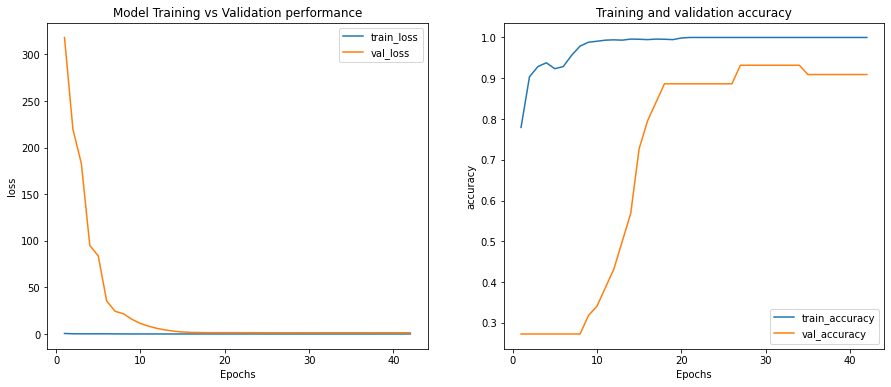

In [5]:
output = deepauto.run(train, target, keras_model_type,project_name=project_name, keras_options=keras_options,
                 model_options=model_options, save_model_flag=True, use_my_model='', verbose=0)

In [6]:
model = output[0]
cat_vocab_dict = output[1]

In [7]:
cat_vocab_dict

defaultdict(<function deep_autoviml.data_load.classify_features.nested_dictionary()>,
            {'radius_mean': defaultdict(<function deep_autoviml.data_load.classify_features.nested_dictionary()>,
                         {'dtype': dtype('float64'),
                          'vocab': [],
                          'size_of_vocab': 385,
                          'max': 28.11,
                          'min': 6.981}),
             'texture_mean': defaultdict(<function deep_autoviml.data_load.classify_features.nested_dictionary()>,
                         {'dtype': dtype('float64'),
                          'vocab': [],
                          'size_of_vocab': 398,
                          'max': 39.28,
                          'min': 9.71}),
             'perimeter_mean': defaultdict(<function deep_autoviml.data_load.classify_features.nested_dictionary()>,
                         {'dtype': dtype('float64'),
                          'vocab': [],
                          'size_o

In [8]:
y_preds = deepauto.predict_model(model, project_name, test_dataset=test,
                                 keras_model_type=keras_model_type, cat_vocab_dict=cat_vocab_dict)


Using <tensorflow.python.keras.engine.functional.Functional object at 0x00000264960ED850> model provided as input...
    loaded model.
Loaded test data size: 114
    Modified column names to fit no-spaces-in-column-names rule in Tensorflow!
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    32 Predictors classified...
        1 variable(s) to be removed since they were ID or low-information variables
Number of variables in dataset is too numerous to print...skipping print
    test data loaded successfully.
    modeltype =  Classification , test data size =  114 , batch_size =  22
    number of steps needed to predict: 6
Predictions shape:(114,)
    Sample predictions from model :[0 0 0 0 0]
    Sample predictions after inverse_transform:['B' 'B' 'B' 'B' 'B']
Time taken in mins for predictions = 0


In [9]:
y_test = test[target][:].values
y_test.shape

(114,)

In [10]:
y_preds[1].shape
#y_preds1.shape

(114,)

In [11]:
from sklearn.metrics import balanced_accuracy_score, classification_report, mean_squared_error

In [12]:
print(classification_report(y_test, y_preds[1]))

              precision    recall  f1-score   support

           B       0.91      0.97      0.94        72
           M       0.95      0.83      0.89        42

    accuracy                           0.92       114
   macro avg       0.93      0.90      0.91       114
weighted avg       0.92      0.92      0.92       114



In [13]:
#print(np.sqrt(mean_squared_error(y_test, y_preds1)))

In [14]:
model.summary()

Model: "model_11"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
radius_mean (InputLayer)        [(None, 1)]          0                                            
__________________________________________________________________________________________________
texture_mean (InputLayer)       [(None, 1)]          0                                            
__________________________________________________________________________________________________
perimeter_mean (InputLayer)     [(None, 1)]          0                                            
__________________________________________________________________________________________________
area_mean (InputLayer)          [(None, 1)]          0                                            
___________________________________________________________________________________________